In [50]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

In [58]:
data = pd.read_csv(r'pysicalinfo.csv', encoding='euc-kr',low_memory=False)
data = data.drop(['순번','측정 일자'],axis=1)
data.columns = [['가슴 둘레', '소매길이', '신장', '허리 둘레', '샅높이', '머리 둘레', '발 길이', '몸무게']]
data.head()

,가슴 둘레,소매길이,신장,허리 둘레,샅높이,머리 둘레,발 길이,몸무게
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167980 entries, 0 to 167979
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   (가슴 둘레,)  167980 non-null  float64
 1   (소매길이,)   167980 non-null  float64
 2   (신장,)     167980 non-null  float64
 3   (허리 둘레,)  167980 non-null  object 
 4   (샅높이,)    167980 non-null  float64
 5   (머리 둘레,)  167980 non-null  float64
 6   (발 길이,)   167980 non-null  float64
 7   (몸무게,)    167980 non-null  float64
dtypes: float64(7), object(1)
memory usage: 10.3+ MB


In [63]:
data = data.apply(pd.to_numeric, errors='coerce')
data.head()

,가슴 둘레,소매길이,신장,허리 둘레,샅높이,머리 둘레,발 길이,몸무게
0,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167980 entries, 0 to 167979
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   (가슴 둘레,)  167980 non-null  float64
 1   (소매길이,)   167980 non-null  float64
 2   (신장,)     167980 non-null  float64
 3   (허리 둘레,)  135669 non-null  float64
 4   (샅높이,)    167980 non-null  float64
 5   (머리 둘레,)  167980 non-null  float64
 6   (발 길이,)   167980 non-null  float64
 7   (몸무게,)    167980 non-null  float64
dtypes: float64(8)
memory usage: 10.3 MB


In [69]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135669 entries, 0 to 135668
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   (가슴 둘레,)  135669 non-null  float64
 1   (소매길이,)   135669 non-null  float64
 2   (신장,)     135669 non-null  float64
 3   (허리 둘레,)  135669 non-null  float64
 4   (샅높이,)    135669 non-null  float64
 5   (머리 둘레,)  135669 non-null  float64
 6   (발 길이,)   135669 non-null  float64
 7   (몸무게,)    135669 non-null  float64
dtypes: float64(8)
memory usage: 9.3 MB


In [126]:
# 데이터 전처리
scaler = MinMaxScaler()
train_x = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns, index=train_x.index)
test_x = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns, index=test_x.index)

In [132]:
# x는 마지막 컬럼을 제외한 모든 컬럼 (입력값들만)
x = data.iloc[:, :-1]  # 마지막 컬럼을 제외한 모든 컬럼
scaled_data = scaler.fit_transform(x)  # x만 스케일링

# 스케일링된 x를 데이터프레임으로 만들기
feature_names = scaler.get_feature_names_out(input_features=x.columns)
x = pd.DataFrame(scaled_data, columns=feature_names)

# y는 마지막 컬럼 (목표값)
y = data.iloc[:, -1]  # 마지막 컬럼을 y로 설정



In [134]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=42)

In [136]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(108535, 7)
(108535,)
(27134, 7)
(27134,)


In [138]:
# 인공신경망 모델 생성 및 학습
model = keras.Sequential([
    keras.layers.Dense(7),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [140]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [142]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
history = model.fit(train_x,train_y, epochs=50,
                    validation_data =(test_x,test_y),
                    callbacks=[early_stop])

Epoch 1/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 207.5909 - mae: 7.0599 - val_loss: 21.3461 - val_mae: 3.5201
Epoch 2/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 22.6283 - mae: 3.6068 - val_loss: 20.4467 - val_mae: 3.3997
Epoch 3/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 22.8023 - mae: 3.6058 - val_loss: 20.3935 - val_mae: 3.4185
Epoch 4/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 22.3421 - mae: 3.5686 - val_loss: 19.8896 - val_mae: 3.3688
Epoch 5/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 21.9800 - mae: 3.5385 - val_loss: 22.7106 - val_mae: 3.6698
Epoch 6/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 21.9588 - mae: 3.5459 - val_loss: 23.8430 - val_mae: 3.6984
Epoch 7/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 22.0246 - mae: 3.5488 - val_loss: 19.7618 - val_mae: 3.3629
Epoch 8/50
3392/3392 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 21.6731 - mae: 3.5191 - val_loss: 21.8874 - val_mae: 3.5884
Epoch 9/50
3392/3392 ━━

In [180]:
# 새로운 데이터 예측
def predict_new_data(new_data):
    # 입력 데이터 전처리
    new_data_scaled = scaler.transform(new_data)  # MinMaxScaler를 사용하여 전처리
    # 예측 수행
    prediction = model.predict(new_data_scaled)
    # 예측값 반환
    return prediction

def draw_graph(prediction, label, history):
    x = prediction / np.max(prediction, axis=0)
    y = label / np.max(label, axis=0)

    minval = min(np.min(x), np.min(y))
    maxval = max(np.max(x), np.max(y))

    fig = plt.figure(figsize=(7, 7))
    plt.title("Regression Result")
    plt.xlabel("Ground Truth")
    plt.ylabel("AI Predict")
    plt.scatter(x, y)
    plt.plot([minval, maxval], [minval, maxval], "red")
    fig.savefig("result.png")

    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(7, 7))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

848/848 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


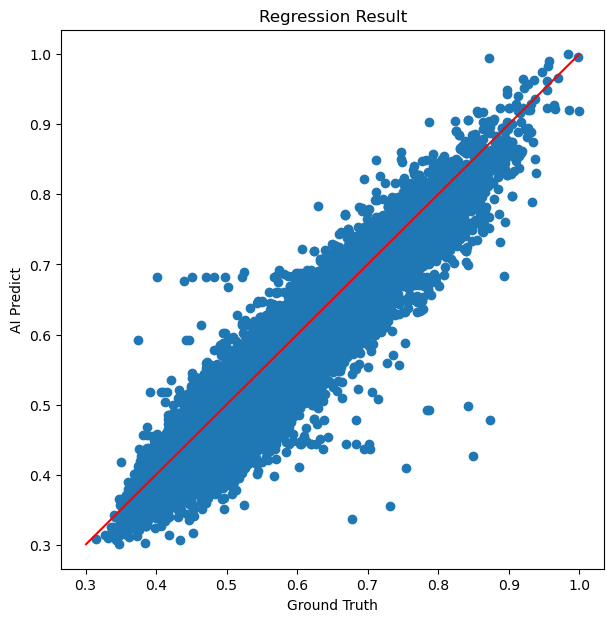

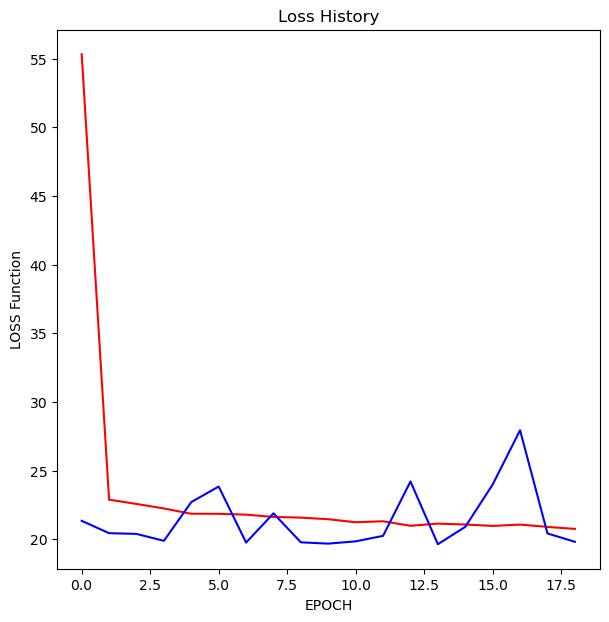

In [182]:
prediction = model.predict(test_x)
draw_graph(prediction, test_y, history)

In [201]:
# 예측 예시 (새로운 데이터 샘플)
new_data_sample = np.array([[98, 89.7, 174, 92, 83, 60, 28]])  # 7개의 입력 피처
prediction = predict_new_data(new_data_sample)  # 예측 값은 (1,1) 모양이어야 함

# 입력값만 포함한 배열
input_data = np.array([[98, 89.7, 174, 92, 83, 60, 28]])  # 입력값 배열

# 입력값에 대해서만 역변환을 적용
result_input = scaler.inverse_transform(input_data)

# 예측값만 그대로 출력
predicted_value = prediction[0][0]

# 결과 출력
print("입력값 역변환 결과:", result_input[0])  # 역변환된 입력값 출력
print("예측 결과:", predicted_value)  # 예측값 출력


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
입력값 역변환 결과: [ 6219.6   2095.35  7948.8  10961.7   8123.3    766.     401.4 ]
예측 결과: 76.9457
